In [4]:
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit import rdBase
from rdkit import RDConfig
import seaborn as sns
import os

In [7]:
datapath = os.path.join(RDConfig.RDDocsDir,"Book/data/cdk2.sdf")

In [8]:
moldf = PandasTools.LoadSDF(datapath)

,Cluster,ID,MODEL.CCRATIO,MODEL.SOURCE,ROMol,b_mmffld_Minimization_Converged-OPLS_2005,id,r_mmffld_Potential_Energy-OPLS_2005,r_mmffld_RMS_Derivative-OPLS_2005,s_st_Chirality_1,s_st_Chirality_2,s_st_Chirality_3
0,1,ZINC03814457,1,CORINA 3.44 0027 09.01.2008,,1,ZINC03814457,-78.6454,0.000213629,NaN,NaN,NaN
1,2,ZINC03814459,1,CORINA 3.44 0027 09.01.2008,,1,ZINC03814459,-67.4705,9.48919e-05,13_S_17_12_14_24,NaN,NaN

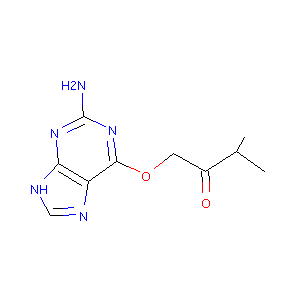
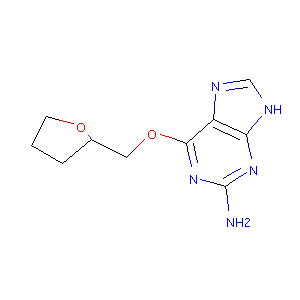

In [9]:
moldf.head(2)

In [24]:
def molwt(mol):
    mw = Descriptors.MolWt(mol)
    return mw
def logp(mol):
    logp = Descriptors.MolLogP(mol)
    return logp

In [25]:
moldf['MW'] = moldf.ROMol.apply(molwt)
moldf['LOGP'] = moldf.ROMol.apply(logp)

,Cluster,ID,MODEL.CCRATIO,MODEL.SOURCE,ROMol,b_mmffld_Minimization_Converged-OPLS_2005,id,r_mmffld_Potential_Energy-OPLS_2005,r_mmffld_RMS_Derivative-OPLS_2005,s_st_Chirality_1,s_st_Chirality_2,s_st_Chirality_3,MW,LOGP
0,1,ZINC03814457,1,CORINA 3.44 0027 09.01.2008,,1,ZINC03814457,-78.6454,0.000213629,NaN,NaN,NaN,235.247,0.5390
1,2,ZINC03814459,1,CORINA 3.44 0027 09.01.2008,,1,ZINC03814459,-67.4705,9.48919e-05,13_S_17_12_14_24,NaN,NaN,235.247,0.4929
2,2,ZINC03814460,1,CORINA 3.44 0027 09.01.2008,,1,ZINC03814460,-89.4303,5.17485e-05,13_R_18_12_14_25,NaN,NaN,248.246,-0.4075
3,3,ZINC00023543,1,CORINA 3.44 0027 09.01.2008,,1,ZINC00023543,-70.2463,6.35949e-05,NaN,NaN,NaN,247.302,1.8942
4,3,ZINC03814458,1,CORINA 3.44 0027 09.01.2008,,1,ZINC03814458,-72.9091,6.51479e-05,13_S_12_18_14_25,NaN,NaN,245.286,1.6702

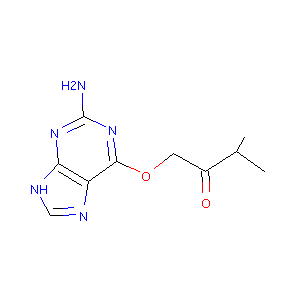
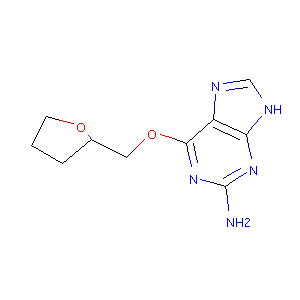
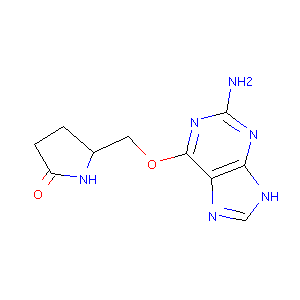
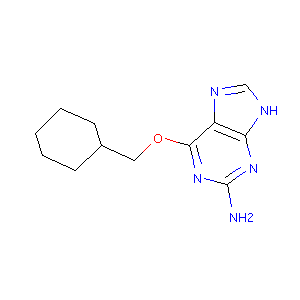
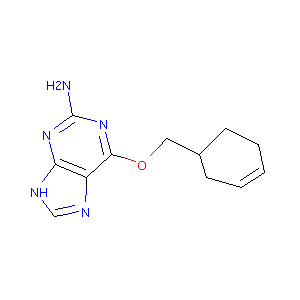

In [26]:
moldf.head(5)

In [27]:
from scipy.stats import kendalltau
sns.set(style='ticks')

In [28]:
x = moldf.MW
y = moldf.LOGP

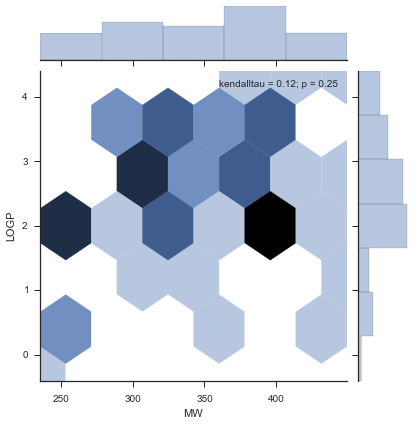

In [29]:
sns.jointplot(x,y, kind='hex', stat_func=kendalltau)

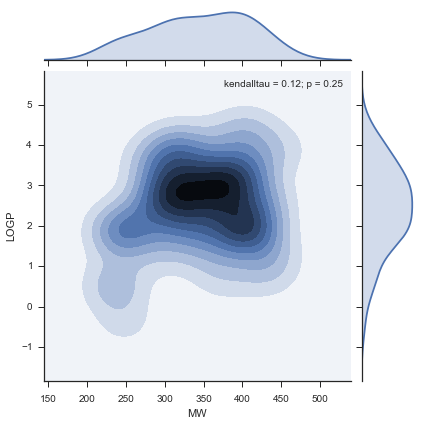

In [30]:
sns.jointplot(x,y, kind='kde', stat_func=kendalltau)

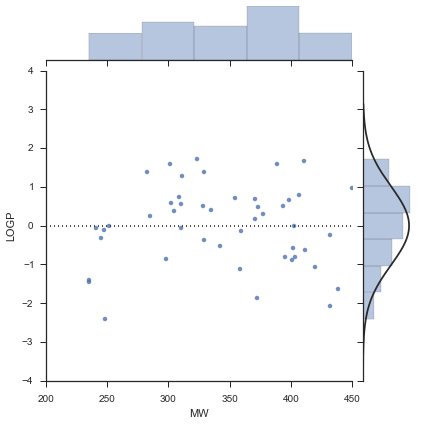

In [31]:
sns.jointplot(x,y, kind='resid', stat_func=kendalltau)